In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#mu value can be changed to observe effect
def f2(r, t):
    mu = 2
    x = r[0]
    xdot = r[1]
    a = 1
    b = 1
    
    fx = xdot
    fy = -mu*xdot +a*x -b*x**3
    
    return np.array([fx,fy], float)

def rk4(f,r,t,h):
    k1 = h * f(r,t)
    k2 = h * f(r+0.5*k1, t+0.5*h)
    k3 = h * f(r+0.5*k2, t+0.5*h)
    k4 = h * f(r + k3, t+h)
    return (k1 + 2*k2 + 2*k3 + k4) / 6

def phase_plot_rk4(r,f,tmax):
    a = 0
    b = tmax
    h = 0.1
    tpoints = np.arange(a,b,h)
    
    initial_vals = r

    phi_points = []
    omega_points = []
    
    for t in tpoints:
        phi_points.append(initial_vals[0])
        omega_points.append(initial_vals[1])
        
        initial_vals += rk4(f,initial_vals,t,h)
    
    plt.plot(tpoints,phi_points)
    return float(phi_points[-1])

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
     0         1
0 -1.0 -1.000000
1 -1.0 -0.979798
2 -1.0 -0.959596
3 -1.0 -0.939394
4 -1.0 -0.919192
          0         1
0 -0.414141  1.000000
1 -0.393939  0.959596
2 -0.393939  0.979798
3 -0.393939  1.000000
4 -0.373737  0.898990


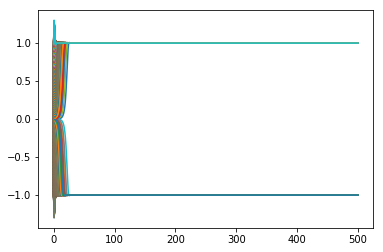

In [6]:
left_100 = []
right_100 = []
count = 0
points_x = np.linspace(-1,1,100)
points_xdot = np.linspace(-1,1,100)
for i in points_x:
    for j in points_xdot:
        point = phase_plot_rk4(np.array([i,j],float),f2,500)
        
        if point < 0:
            left_100.append((i,j))
        else:
            right_100.append((i,j))
            
        count += 1
        if count%1000 == 0:
            print(count)

import pandas as pd

df = pd.DataFrame(left_100)
df2 = pd.DataFrame(right_100)
print(df.head())
print(df2.head())
df.to_csv('left_100_mu2.csv', sep=',', encoding='utf-8', index=False)
df2.to_csv('right_100_mu2.csv', sep=',', encoding='utf-8', index=False)

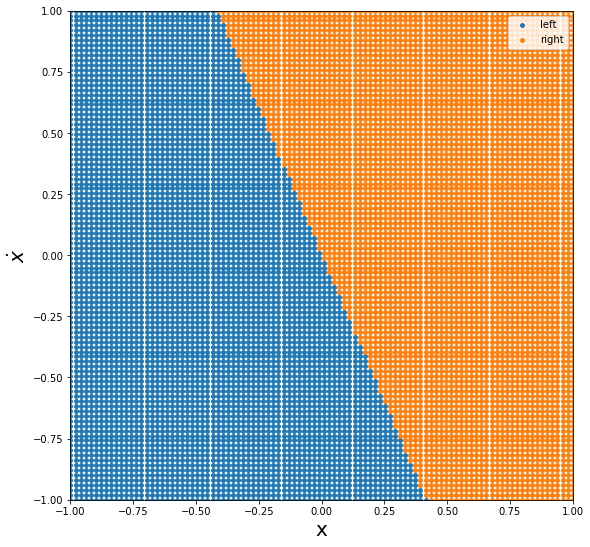

In [7]:
x,y = list(zip(*left_100))
x0,y0 = list(zip(*right_100))
plt.figure(figsize=(9,9))
plt.scatter(x,y,s=15, label='left')
plt.scatter(x0,y0,s=15,label='right')
plt.xlabel("x", fontsize=20)
plt.ylabel("$\dotx$", fontsize=20)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
#plt.savefig("mu2.png")
plt.show()